(150, 150, 3)

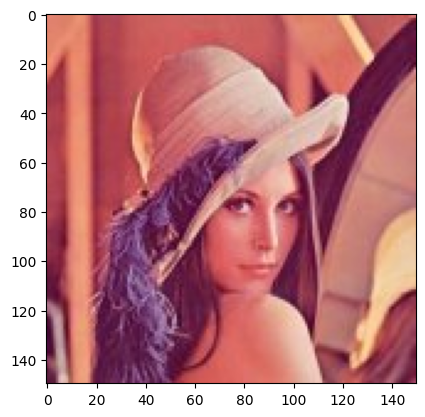

In [1]:

#! thêm các thư viện hỗ trợ 
import time
from PIL import Image
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image # Open & save 
import math
#! chương trình hiện ảnh gốc 
img = cv2.imread('Lenna.jpg')
#! sử dụng cvtColor để chuyển từ BGR sang RGB lại bằng tham COLOR_BGR2RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#! thông tin của bức ảnh trên, w x h x c 
img.shape


<h1>Image Smoothing</h1>

Runtime is 0.5018417835235596 seconds.


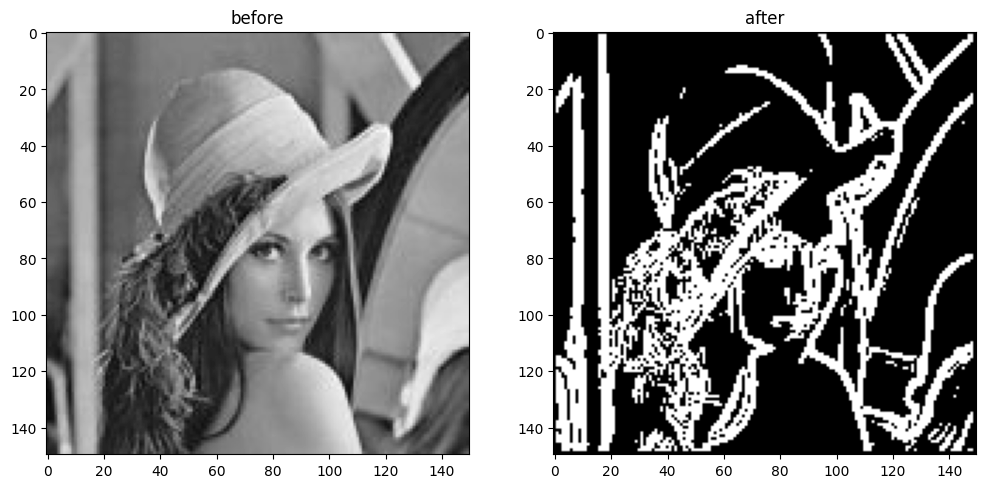

In [7]:
def converter_transform(img):
    image = img.copy()
    for i in range(img.shape[0]):
        for j in range(image.shape[1]):
            image[i,j]=img[img.shape[0]-i-1,img.shape[1]-j-1]
    return image

def converter(img,kernel):
    kernel = converter_transform(kernel)
    imgH,imgW = img.shape
    kernelH,kernelW = kernel.shape
    h = kernelH//2
    w = kernelW//2
    conv_img=np.zeros((img.shape[0],img.shape[1]),dtype=int)
    for i in range(h,imgH-h):
        for j in range(w,imgW-w):
            sum=0
            for m in range(kernelH):
                for n in range(kernelW):
                    sum = (sum+kernel[m,n]*img[i-h+m,j-w+n])
            conv_img[i,j]=sum
    return conv_img  

def norm(img1,img2):
    newImg = np.zeros((img1.shape),dtype=int)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            temp=(img1[i,j]**2+img2[i,j]**2)**0.5
            if(temp>90):
                newImg[i,j]=255
            else:
                newImg[i,j]=0
    return newImg

#! mở ảnh
img = cv2.imread("Lenna.jpg",0)
#! bắt đầu thuật toán
#! starting time
start = time.time()

kernelX = [[-1,-2,-1],[0,0,0],[1,2,1]]
temp1=np.array(kernelX)
gy = converter(img,temp1)

kernelY = [[-1,0,1],
            [-1,0,1],
            [-2,0,2]]

temp2=np.array(kernelY)
gx = converter(img,temp2)

sobel = norm(gx,gy)
#! end time
end = time.time()
#! total time taken
print(f"Runtime is {end - start} seconds.")

#!show ảnh
fig = plt.figure(figsize=(12, 8)) 
(ax1, ax2) = fig.subplots(1, 2)
#! show ảnh xám gốc 
ax1.set_title("before")             
ax1.imshow(img, cmap='gray')     
#! show ảnh xám sau khi điều chỉnh
ax2.set_title("after") 
ax2.imshow(sobel, cmap='gray')       
